In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#读入三份训练数据
sale = pd.read_csv('../Data/Train/train_sales_data.csv')
search = pd.read_csv('../Data/Train/train_search_data.csv')
reply = pd.read_csv('../Data/Train/train_user_reply_data.csv')
print('sale_data shape: ' + str(sale.shape))
print('search_data shape: ' + str(search.shape))
print('user_reply_data shape: ' + str(reply.shape))

sale_data shape: (31680, 7)
search_data shape: (31680, 6)
user_reply_data shape: (1440, 5)


In [4]:
#统计数据集中的缺失值
print(sale.count())
print(search.count())
print(reply.count())

province       31680
adcode         31680
model          31680
bodyType       31680
regYear        31680
regMonth       31680
salesVolume    31680
dtype: int64
province      31680
adcode        31680
model         31680
regYear       31680
regMonth      31680
popularity    31680
dtype: int64
model              1440
regYear            1440
regMonth           1440
carCommentVolum    1440
newsReplyVolum     1440
dtype: int64


['上海' '云南' '内蒙古' '北京' '四川' '安徽' '山东' '山西' '广东' '广西' '江苏' '江西' '河北' '河南'
 '浙江' '湖北' '湖南' '福建' '辽宁' '重庆' '陕西' '黑龙江']
[1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440]
[31. 53. 15. 11. 51. 34. 37. 14. 44. 45. 32. 36. 13. 41. 33. 42. 43. 35.
 21. 50. 61. 23.]
[1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440]
['3c974920a76ac9c1' '3d7554f1f56dd664' '2d0d2c3403909fdb'
 'a28bb927b6fcb33c' '17bc272c93f19d56' '2a2ab41f8f6ff1cb'
 'c06a2a387c0ee510' '7023efdab9cedc03' 'af6f4f548684e14d'
 '7cf283430b3b5e38' 'd4efbebb087fd03f' '7245e0ee27b195cd'
 '8c915fe4632fb9fa' '6155b214590c66e6' '28e29f2c03dcd84c'
 '37aa9169b575ef79' '63065128401bb3ff' 'ea489c253676aafc'
 'cd5841d44fd7625e' 'b25c4e2e3856af22' '4a103c30d593fbbe'
 '7a7885e2d7c00bcf' '346393c2c6305fb1' '02aab221aabc03b9'
 '5d7fb682edd0f937' 'a207df29ec9583f0' 'b4be3a4917289c82'
 'ef76

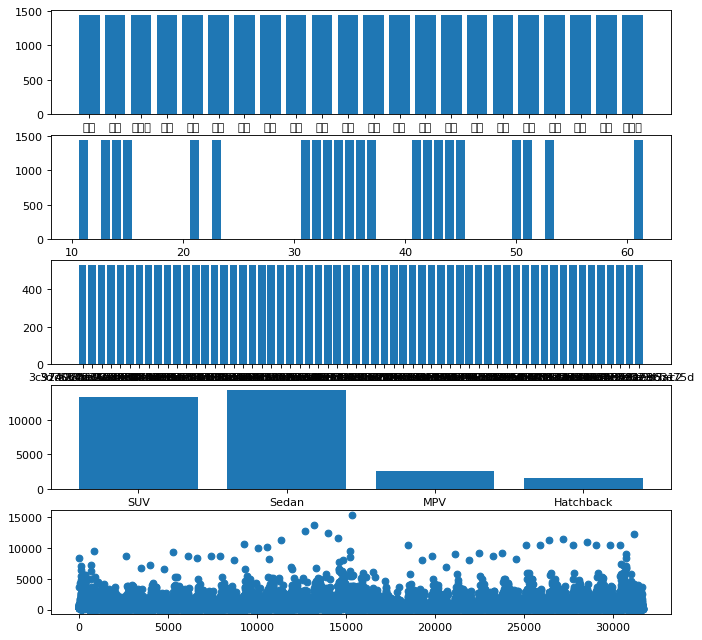

In [5]:
plt.figure(figsize=(10, 10), dpi=80)
ax1 = plt.subplot(5, 1, 1)
province_sum = sale['province'].unique()
province_count = []
for p in province_sum:
    temp = sale[(sale['province'] == p)]
    province_count.append(temp.shape[0])
print(province_sum)
print(province_count)
plt.bar(province_sum, province_count)

adcode_sum = (sale['adcode']/10000).unique()
adcode_count = []
for ad in adcode_sum:
    temp = sale[((sale['adcode']/10000) == ad)]
    adcode_count.append(temp.shape[0])
print(adcode_sum)
print(adcode_count)
ax2 = plt.subplot(5, 1, 2)
plt.bar(adcode_sum, adcode_count)

model_sum = sale['model'].unique()
model_count = []
for m in model_sum:
    temp = sale[(sale['model'] == m)]
    model_count.append(temp.shape[0])
print(model_sum)
print(model_count)
ax3 = plt.subplot(5, 1, 3)
plt.bar(model_sum, model_count)

body_sum = sale['bodyType'].unique()
body_count = []
for b in body_sum:
    temp = sale[(sale['bodyType'] == b)]
    body_count.append(temp.shape[0])
print(body_sum)
print(body_count)
ax4 = plt.subplot(5, 1, 4)
plt.bar(body_sum, body_count)

count = sale['salesVolume'].count()
print(count)
index = range(count)
ax5 = plt.subplot(5, 1, 5)
plt.scatter(index, sale['salesVolume'])

['河南' '广东' '山东' '河北' '江苏' '四川' '浙江' '云南' '陕西' '山西' '广西' '湖南' '北京' '湖北'
 '安徽' '辽宁' '上海' '江西' '福建' '黑龙江' '内蒙古' '重庆']
[1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440]
[41. 44. 37. 13. 32. 51. 33. 53. 61. 14. 45. 43. 11. 42. 34. 21. 31. 36.
 35. 23. 15. 50.]
[1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440]
['17bc272c93f19d56' '63065128401bb3ff' '6155b214590c66e6'
 '0797526c057dcf5b' '2a2ab41f8f6ff1cb' 'c6cd4e0e073f5ac2'
 '3d7554f1f56dd664' '28e29f2c03dcd84c' 'fc32b1a017b34efe'
 '8c915fe4632fb9fa' '936168bd4850913d' '06880909932890ca'
 'd4efbebb087fd03f' 'fde95ea242abd896' 'f270f6a489c6a9d7'
 'cd5841d44fd7625e' '97f15de12cfabbd5' 'f8a6975573af1b33'
 '3e21824be728cbec' '3c974920a76ac9c1' '54fc07138d70374c'
 'da457d15788fe8ee' 'ef76a85c4b39f693' '7023efdab9cedc03'
 '6858d6dfe680bdf7' '2d0d2c3403909fdb' 'bb9fbec9a2833839'
 'c06a

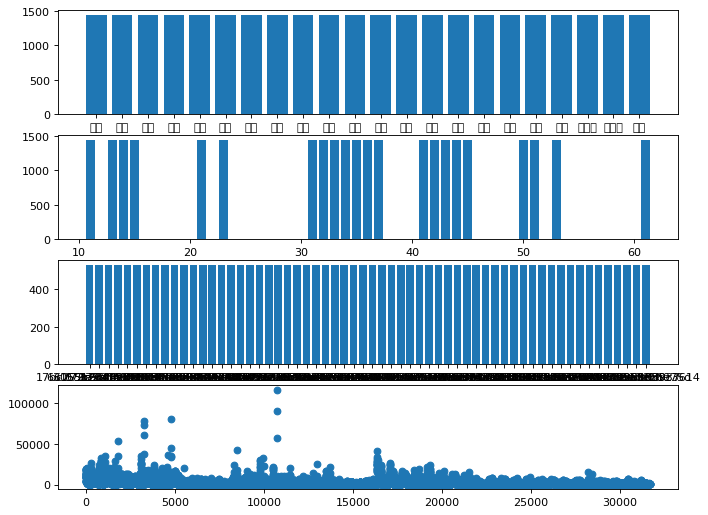

In [7]:
plt.figure(figsize=(10, 10), dpi=80)
ax1 = plt.subplot(5, 1, 1)
province_sum = search['province'].unique()
province_count = []
for p in province_sum:
    temp = search[(search['province'] == p)]
    province_count.append(temp.shape[0])
print(province_sum)
print(province_count)
plt.bar(province_sum, province_count)

adcode_sum = (search['adcode']/10000).unique()
adcode_count = []
for ad in adcode_sum:
    temp = search[((search['adcode']/10000) == ad)]
    adcode_count.append(temp.shape[0])
print(adcode_sum)
print(adcode_count)
ax2 = plt.subplot(5, 1, 2)
plt.bar(adcode_sum, adcode_count)

model_sum = search['model'].unique()
model_count = []
for m in model_sum:
    temp = search[(search['model'] == m)]
    model_count.append(temp.shape[0])
print(model_sum)
print(model_count)
ax3 = plt.subplot(5, 1, 3)
plt.bar(model_sum, model_count)

count = search['popularity'].count()
print(count)
index = range(count)
ax5 = plt.subplot(5, 1, 4)
plt.scatter(index, search['popularity'])

['02aab221aabc03b9' '04e66e578f653ab9' '06880909932890ca'
 '0797526c057dcf5b' '12f8b7e14947c34d' '17363f08d683d52b'
 '17bc272c93f19d56' '212083a9246d2fd3' '28e29f2c03dcd84c'
 '2a2ab41f8f6ff1cb' '2d0d2c3403909fdb' '346393c2c6305fb1'
 '37aa9169b575ef79' '3c974920a76ac9c1' '3d7554f1f56dd664'
 '3e21824be728cbec' '4a103c30d593fbbe' '4f79773e600518a6'
 '54fc07138d70374c' '5b1c11c3efed5312' '5d7fb682edd0f937'
 '6155b214590c66e6' '61e73e32ad101892' '63065128401bb3ff'
 '6858d6dfe680bdf7' '7023efdab9cedc03' '7245e0ee27b195cd'
 '79de4e4b24c35b04' '7a7885e2d7c00bcf' '7aab7fca2470987e'
 '7cf283430b3b5e38' '8c915fe4632fb9fa' '936168bd4850913d'
 '97f15de12cfabbd5' '9c1c7ee8ebdda299' 'a207df29ec9583f0'
 'a28bb927b6fcb33c' 'a432c483b5beb856' 'a9a43d1a7ecbe75d'
 'af6f4f548684e14d' 'b25c4e2e3856af22' 'b4be3a4917289c82'
 'bb9fbec9a2833839' 'c06a2a387c0ee510' 'c6833cb891626c17'
 'c6cd4e0e073f5ac2' 'cc21c7e91a3b5a0c' 'cd5841d44fd7625e'
 'd0f245b8781e3631' 'd4efbebb087fd03f' 'da457d15788fe8ee'
 'dff803b4024d

KeyError: 'carCommentVolum'

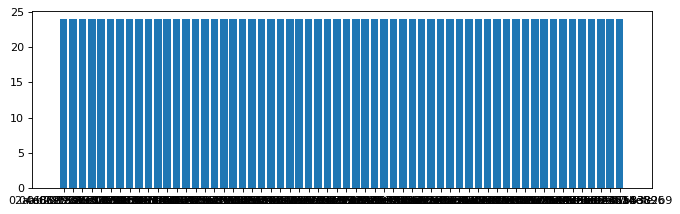

In [8]:
plt.figure(figsize=(10, 10), dpi=80)
model_sum = reply['model'].unique()
model_count = []
for m in model_sum:
    temp = reply[(reply['model'] == m)]
    model_count.append(temp.shape[0])
print(model_sum)
print(model_count)
ax1 = plt.subplot(3, 1, 1)
plt.bar(model_sum, model_count)

count = search['carCommentVolum'].count()
print(count)
index = range(count)
ax2 = plt.subplot(3, 1, 2)
plt.scatter(index, search['carCommentVolum'])

count = search['newsReplyVolum'].count()
print(count)
index = range(count)
ax3 = plt.subplot(3, 1, 3)
plt.scatter(index, search['newsReplyVolum'])